In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os
import re

In [2]:
if not os.path.exists('output'):
    os.makedirs('output')
print("📁 Carpeta 'output' creada para guardar resultados.")


📁 Carpeta 'output' creada para guardar resultados.


In [3]:
file_path = 'imdb_top_250.csv'

try:
    data = pd.read_csv(file_path)
    print(f"✔️ Archivo cargado correctamente: {len(data)} filas y {len(data.columns)} columnas.")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo. Verifica la ruta.")
    data = None


✔️ Archivo cargado correctamente: 250 filas y 10 columnas.


In [4]:
if data is not None:
    data.columns = ['Ranking', 'Título', 'Año', 'Género', 'Duración', 'Origen', 
                    'Director', 'Calificación IMDb', 'Cantidad de Votos', 'Enlace IMDb']
    print("✔️ Columnas renombradas:")
    print(data.head())


✔️ Columnas renombradas:
   Ranking                    Título   Año                             Género  \
0        1  The Shawshank Redemption  1994                              Drama   
1        2             The Godfather  1972                      Drama | Crime   
2        3    The Godfather: Part II  1974                      Drama | Crime   
3        4           The Dark Knight  2008  Drama | Action | Thriller | Crime   
4        5              12 Angry Men  1957                              Drama   

   Duración    Origen              Director  Calificación IMDb  \
0  2h 22min       USA        Frank Darabont                9.3   
1  2h 55min       USA  Francis Ford Coppola                9.2   
2  3h 22min       USA  Francis Ford Coppola                9.0   
3  2h 32min  USA | UK     Christopher Nolan                9.0   
4  1h 36min       USA          Sidney Lumet                8.9   

   Cantidad de Votos                           Enlace IMDb  
0            2030817  https://

In [5]:
if data is not None:
    data['Cantidad de Votos'] = data['Cantidad de Votos'].replace(',', '', regex=True).astype(int)
    print("✔️ 'Cantidad de Votos' convertido a formato numérico.") 

def duration_to_minutes(duration):
    if pd.isnull(duration):
        return None
    if isinstance(duration, str):
        hours = re.search(r'(\d+)h', duration)
        minutes = re.search(r'(\d+)min', duration)
        hours = int(hours.group(1)) if hours else 0
        minutes = int(minutes.group(1)) if minutes else 0
        return hours * 60 + minutes
    return None

if data is not None:
    data['Duración (minutos)'] = data['Duración'].apply(duration_to_minutes)
    data['Duración (horas)'] = data['Duración (minutos)'] / 60
    print("✔️ 'Duración' transformada a minutos y horas.")



✔️ 'Cantidad de Votos' convertido a formato numérico.
✔️ 'Duración' transformada a minutos y horas.


In [6]:
if data is not None:
    data['Década'] = (data['Año'] // 10 * 10).astype(str) + 's'
    print("✔️ Columna 'Década' agregada.")

if data is not None:
    data['Calidad'] = pd.cut(data['Calificación IMDb'], bins=[0, 6, 8, 10], labels=['Baja', 'Media', 'Alta'])
    print("✔️ Clasificación de calidad agregada.")



✔️ Columna 'Década' agregada.
✔️ Clasificación de calidad agregada.


In [7]:
if data is not None:
    print("🎥 Lista completa de las 250 películas:")
    print(data[['Ranking', 'Título', 'Año', 'Calificación IMDb', 'Cantidad de Votos']].to_string(index=False))


🎥 Lista completa de las 250 películas:
 Ranking                                                               Título  Año  Calificación IMDb  Cantidad de Votos
       1                                             The Shawshank Redemption 1994                9.3            2030817
       2                                                        The Godfather 1972                9.2            1392322
       3                                               The Godfather: Part II 1974                9.0             964841
       4                                                      The Dark Knight 2008                9.0            1998623
       5                                                         12 Angry Men 1957                8.9             571145
       6                                                     Schindler's List 1993                8.9            1050056
       7                        The Lord of the Rings: The Return of the King 2003                8.9            1

In [8]:
if data is not None:
    top_10 = data.sort_values(by='Calificación IMDb', ascending=False).head(10)
    top_10['Cantidad de Votos'] = top_10['Cantidad de Votos'].apply(lambda x: f"{x:,}")
    print("🏆 Top 10 películas con mejor calificación IMDb:")
    print(top_10[['Ranking', 'Título', 'Año', 'Calificación IMDb', 'Cantidad de Votos']].to_string(index=False))


🏆 Top 10 películas con mejor calificación IMDb:
 Ranking                                        Título  Año  Calificación IMDb Cantidad de Votos
       1                      The Shawshank Redemption 1994                9.3         2,030,817
       2                                 The Godfather 1972                9.2         1,392,322
       3                        The Godfather: Part II 1974                9.0           964,841
       4                               The Dark Knight 2008                9.0         1,998,623
       5                                  12 Angry Men 1957                8.9           571,145
       6                              Schindler's List 1993                8.9         1,050,056
       7 The Lord of the Rings: The Return of the King 2003                8.9         1,445,888
       8                                  Pulp Fiction 1994                8.9         1,585,797
       9               Il buono, il brutto, il cattivo 1966                8.9 

In [9]:
if data is not None:
    data.to_csv('output/movies_enriched.csv', index=False)
    print("✔️ Datos exportados a 'output/movies_enriched.csv'.")
if data is not None:
    conn = sqlite3.connect('output/movies.db')
    data.to_sql('imdb_top_250', conn, if_exists='replace', index=False)
    conn.close()
    print("✔️ Datos exportados a SQLite en 'output/movies.db'.")



✔️ Datos exportados a 'output/movies_enriched.csv'.
✔️ Datos exportados a SQLite en 'output/movies.db'.


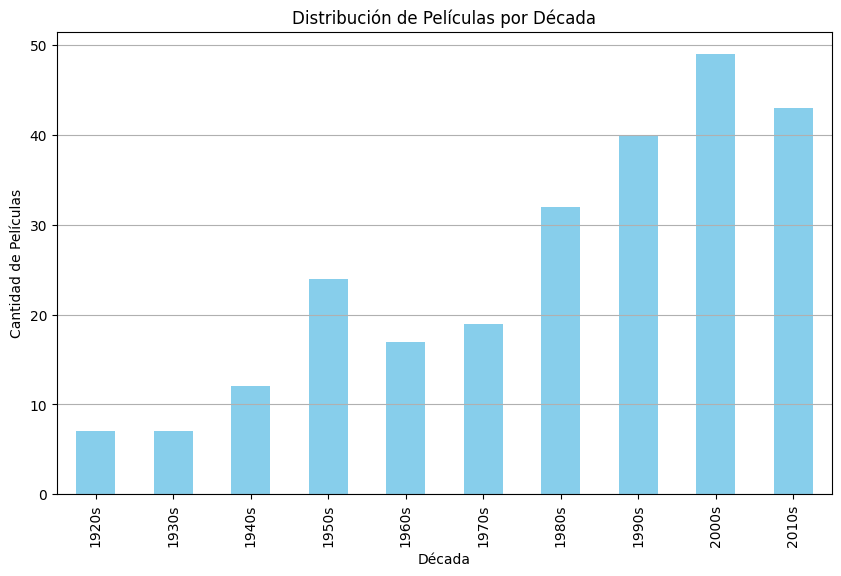

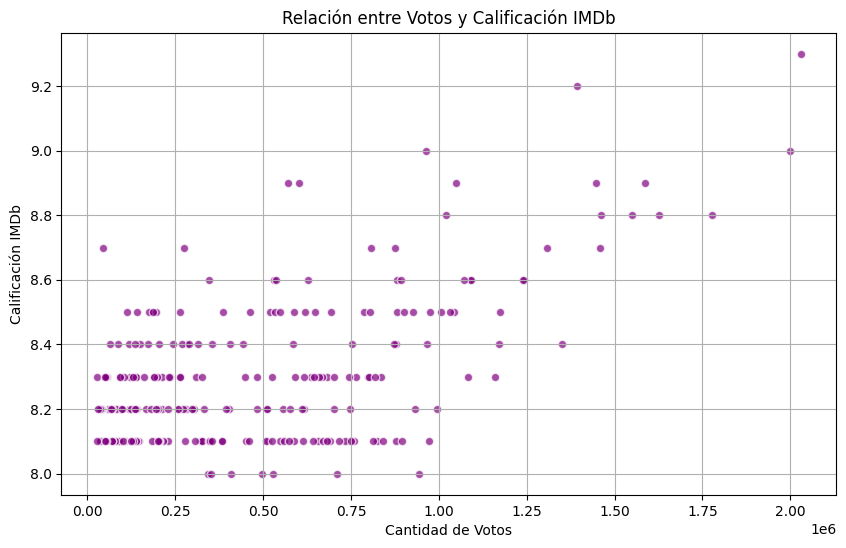

In [10]:
if data is not None:
    data['Década'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('Distribución de Películas por Década')
    plt.xlabel('Década')
    plt.ylabel('Cantidad de Películas')
    plt.grid(axis='y')
    plt.show()

if data is not None:
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Cantidad de Votos'], data['Calificación IMDb'], alpha=0.7, color='purple', edgecolors='w')
    plt.title('Relación entre Votos y Calificación IMDb')
    plt.xlabel('Cantidad de Votos')
    plt.ylabel('Calificación IMDb')
    plt.grid(True)
    plt.show()


